## K-Means Clustering

**Overview**<br>
HELP International is an international humanitarian NGO that is committed to fighting poverty and providing the people of backward countries with basic amenities and relief during the time of disasters and natural calamities.After the recent funding programmes, they have been able to raise around $ 10 million. Now the CEO of the NGO needs to decide how to use this money strategically and effectively. The significant issues that come while making this decision are mostly related to choosing the countries that are in the direst need of aid. 

My job is:-
- To categorise the countries using some socio-economic and health factors that determine the overall development of the country. 
- We need to suggest the countries which the CEO needs to focus on the most. 

The steps are broadly:
1. Read and understand the data
2. Clean the data
3. Visualization of data
3. Prepare the data for modelling
4. Modelling
5. Final analysis

# 1. Read and understand the data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')


import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

In [2]:
# read the dataset
country = pd.read_csv("Country-data.csv")
country

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


In [3]:





# 'shape', gives us the total number of rows and columns in the dataframe.
country.shape

(167, 10)

In [4]:
# "info", gives us the total number of non-null entries in each of the columns.
country.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
country       167 non-null object
child_mort    167 non-null float64
exports       167 non-null float64
health        167 non-null float64
imports       167 non-null float64
income        167 non-null int64
inflation     167 non-null float64
life_expec    167 non-null float64
total_fer     167 non-null float64
gdpp          167 non-null int64
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [5]:
# describe', gives us a summary of the numerical columns in the dataframe
country.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


# 2. Clean the data

In [6]:
# Calculating the Missing Values % contribution in Dataframe
round(100*(country.isnull().sum())/len(country), 2)

country       0.0
child_mort    0.0
exports       0.0
health        0.0
imports       0.0
income        0.0
inflation     0.0
life_expec    0.0
total_fer     0.0
gdpp          0.0
dtype: float64

### Inference:
- None of the columns have null values hence no imputation or drop required.

In [7]:
# Datatype check for the dataframe
country.dtypes

country        object
child_mort    float64
exports       float64
health        float64
imports       float64
income          int64
inflation     float64
life_expec    float64
total_fer     float64
gdpp            int64
dtype: object

### Inference:
- None of the columns have inconsistent datatype, hence no conversion is required.

In [8]:
# Duplicates check
country.loc[country.duplicated()]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp


### Inference:
- No duplicate values, hence no drop is required.

Converting imports,exports and health spending from percentage values to actual values of their GDP per capita .Because the percentage values don't give a clear picture of that country. For example Austria and Belarus have almost same exports % but their gdpp has a huge gap which doesn't give an accurate idea of which country is more developed than the other.

In [9]:
# Converting exports,imports and health spending percentages to absolute values.
country['exports'] = country['exports'] * country['gdpp']/100
country['imports'] = country['imports'] * country['gdpp']/100
country['health'] = country['health'] * country['gdpp']/100
country

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,1384.02,155.9250,1565.190,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,3847.50,662.8500,2376.000,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,943.20,89.6040,1050.620,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,393.00,67.8580,450.640,4480,23.60,67.5,4.67,1310


# 3. Visualization of the data 

### Checking the coorelations between the variables

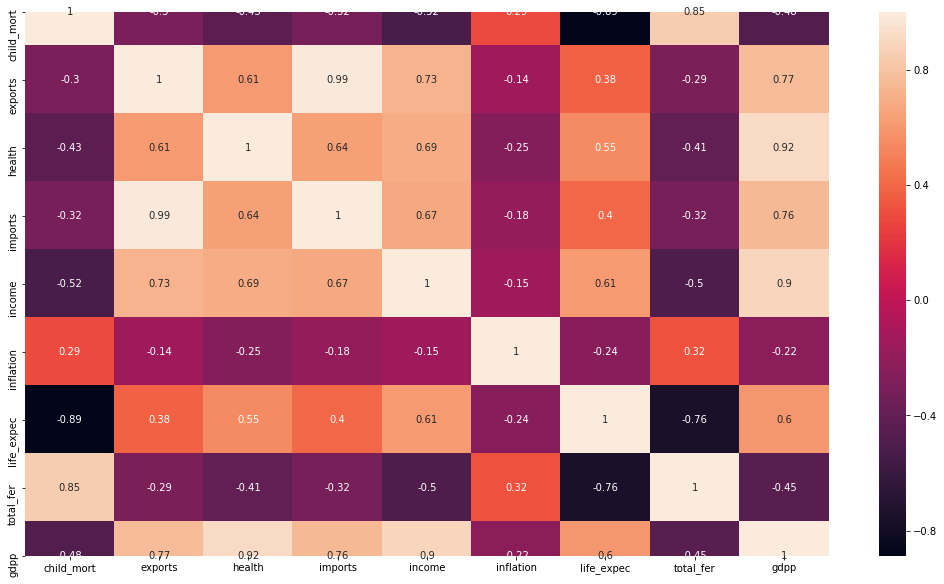

In [10]:
plt.figure(figsize=(18,10))
sns.heatmap(country.corr(), annot= True)
plt.show()

### Inference:
- imports and exports are highly correlated with correlation of 0.99
- health and gdpp are highly correlated with correlation of 0.92
- income and gdpp are highly correlated with correlation of 0.9
- child_mortality and life_expentency are highly correlated with correlation of -0.89
- child_mortality and total_fertility are highly correlated with correlation of 0.85
- gdpp and exports are highly correlated with correlation of 0.77
- gdpp and imports are highly correlated with correlation of 0.76
- life_expentency and total_fertility are highly correlated with correlation of -0.76
- income and exports are highly correlated with correlation of 0.73

## Univariate analysis:-

We need to choose the countries that are in the direst need of aid. Hence, we need to identify those countries with using some socio-economic and health factors that determine the overall development of the country.

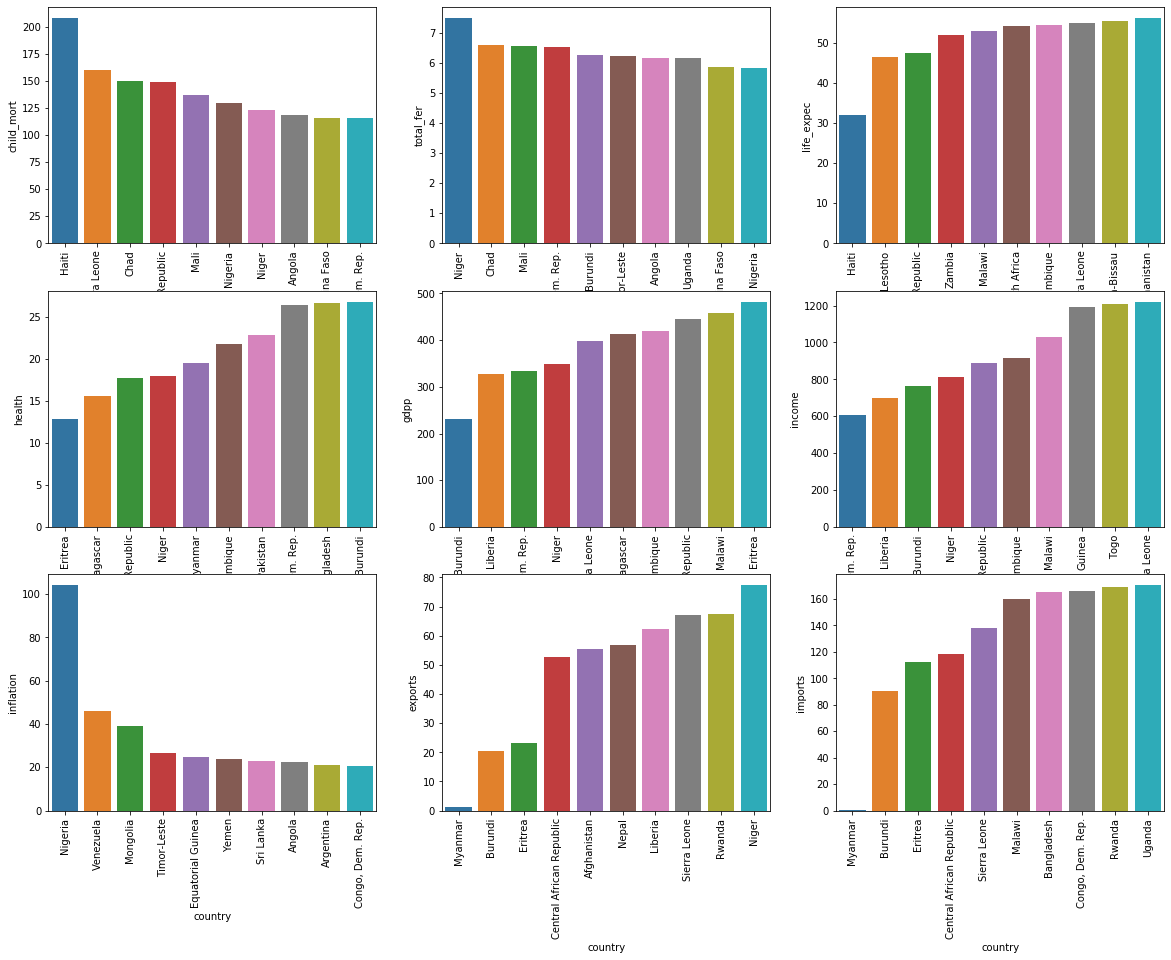

In [11]:
plt.figure(figsize=(20, 20))
# Child Mortality Rate : Death of children under 5 years of age per 1000 live births
plt.subplot(4,3,1)
sns.barplot(x='country', y='child_mort', data=country.sort_values('child_mort', ascending = False).head(10))
plt.xticks(rotation = 90)

# Fertility Rate: The number of children that would be born to each woman if the current age-fertility rates remain the same
plt.subplot(4,3,2)
sns.barplot(x='country', y='total_fer', data=country.sort_values('total_fer', ascending = False).head(10))
plt.xticks(rotation = 90)

# Life Expectancy: The average number of years a new born child would live if the current mortality patterns are to remain same
plt.subplot(4,3,3)
sns.barplot(x='country', y='life_expec', data=country.sort_values('life_expec', ascending = True).head(10))
plt.xticks(rotation = 90)

# Health :Total health spending as %age of Total GDP.
plt.subplot(4,3,4)
sns.barplot(x='country', y='health', data=country.sort_values('health', ascending = True).head(10))
plt.xticks(rotation = 90)

# The GDP per capita : Calculated as the Total GDP divided by the total population.
plt.subplot(4,3,5)
sns.barplot(x='country', y='gdpp', data=country.sort_values('gdpp', ascending = True).head(10))
plt.xticks(rotation = 90)

# Per capita Income : Net income per person
plt.subplot(4,3,6)
sns.barplot(x='country', y='income', data=country.sort_values('income', ascending = True).head(10))
plt.xticks(rotation = 90)

# Inflation: The measurement of the annual growth rate of the Total GDP
plt.subplot(4,3,7)
sns.barplot(x='country', y='inflation', data=country.sort_values('inflation', ascending = False).head(10))
plt.xticks(rotation = 90)

# Exports: Exports of goods and services. Given as %age of the Total GDP
plt.subplot(4,3,8)
sns.barplot(x='country', y='exports', data=country.sort_values('exports', ascending = True).head(10))
plt.xticks(rotation = 90)

# Imports: Imports of goods and services. Given as %age of the Total GDP
plt.subplot(4,3,9)
sns.barplot(x='country', y='imports', data=country.sort_values('imports', ascending = True).head(10))
plt.xticks(rotation = 90)
plt.show()

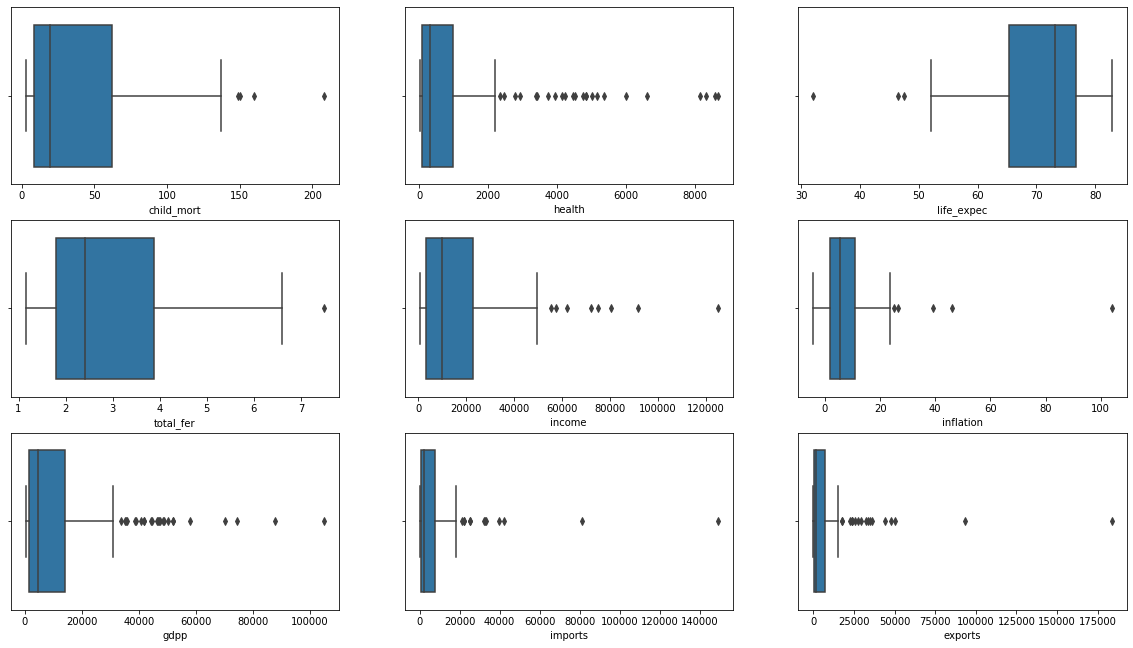

In [12]:
plt.figure(figsize=(20, 15))
plt.subplot(4,3,1)
sns.boxplot(country['child_mort'])
plt.subplot(4,3,2)
sns.boxplot(country['health'])
plt.subplot(4,3,3)
sns.boxplot(country['life_expec'])
plt.subplot(4,3,4)
sns.boxplot(country['total_fer'])
plt.subplot(4,3,5)
sns.boxplot(country['income'])
plt.subplot(4,3,6)
sns.boxplot(country['inflation'])
plt.subplot(4,3,7)
sns.boxplot(country['gdpp'])
plt.subplot(4,3,8)
sns.boxplot(country['imports'])
plt.subplot(4,3,9)
sns.boxplot(country['exports'])
plt.show()

## Bi-variate analysis (Numerical-Numerical)

#### Visualising Numeric Variables

Let's make a pairplot of all the numeric variables

In [13]:
num_var=country[['child_mort', 'exports', 'health', 'imports', 'income', 'inflation', 'life_expec', 'total_fer', 'gdpp']]

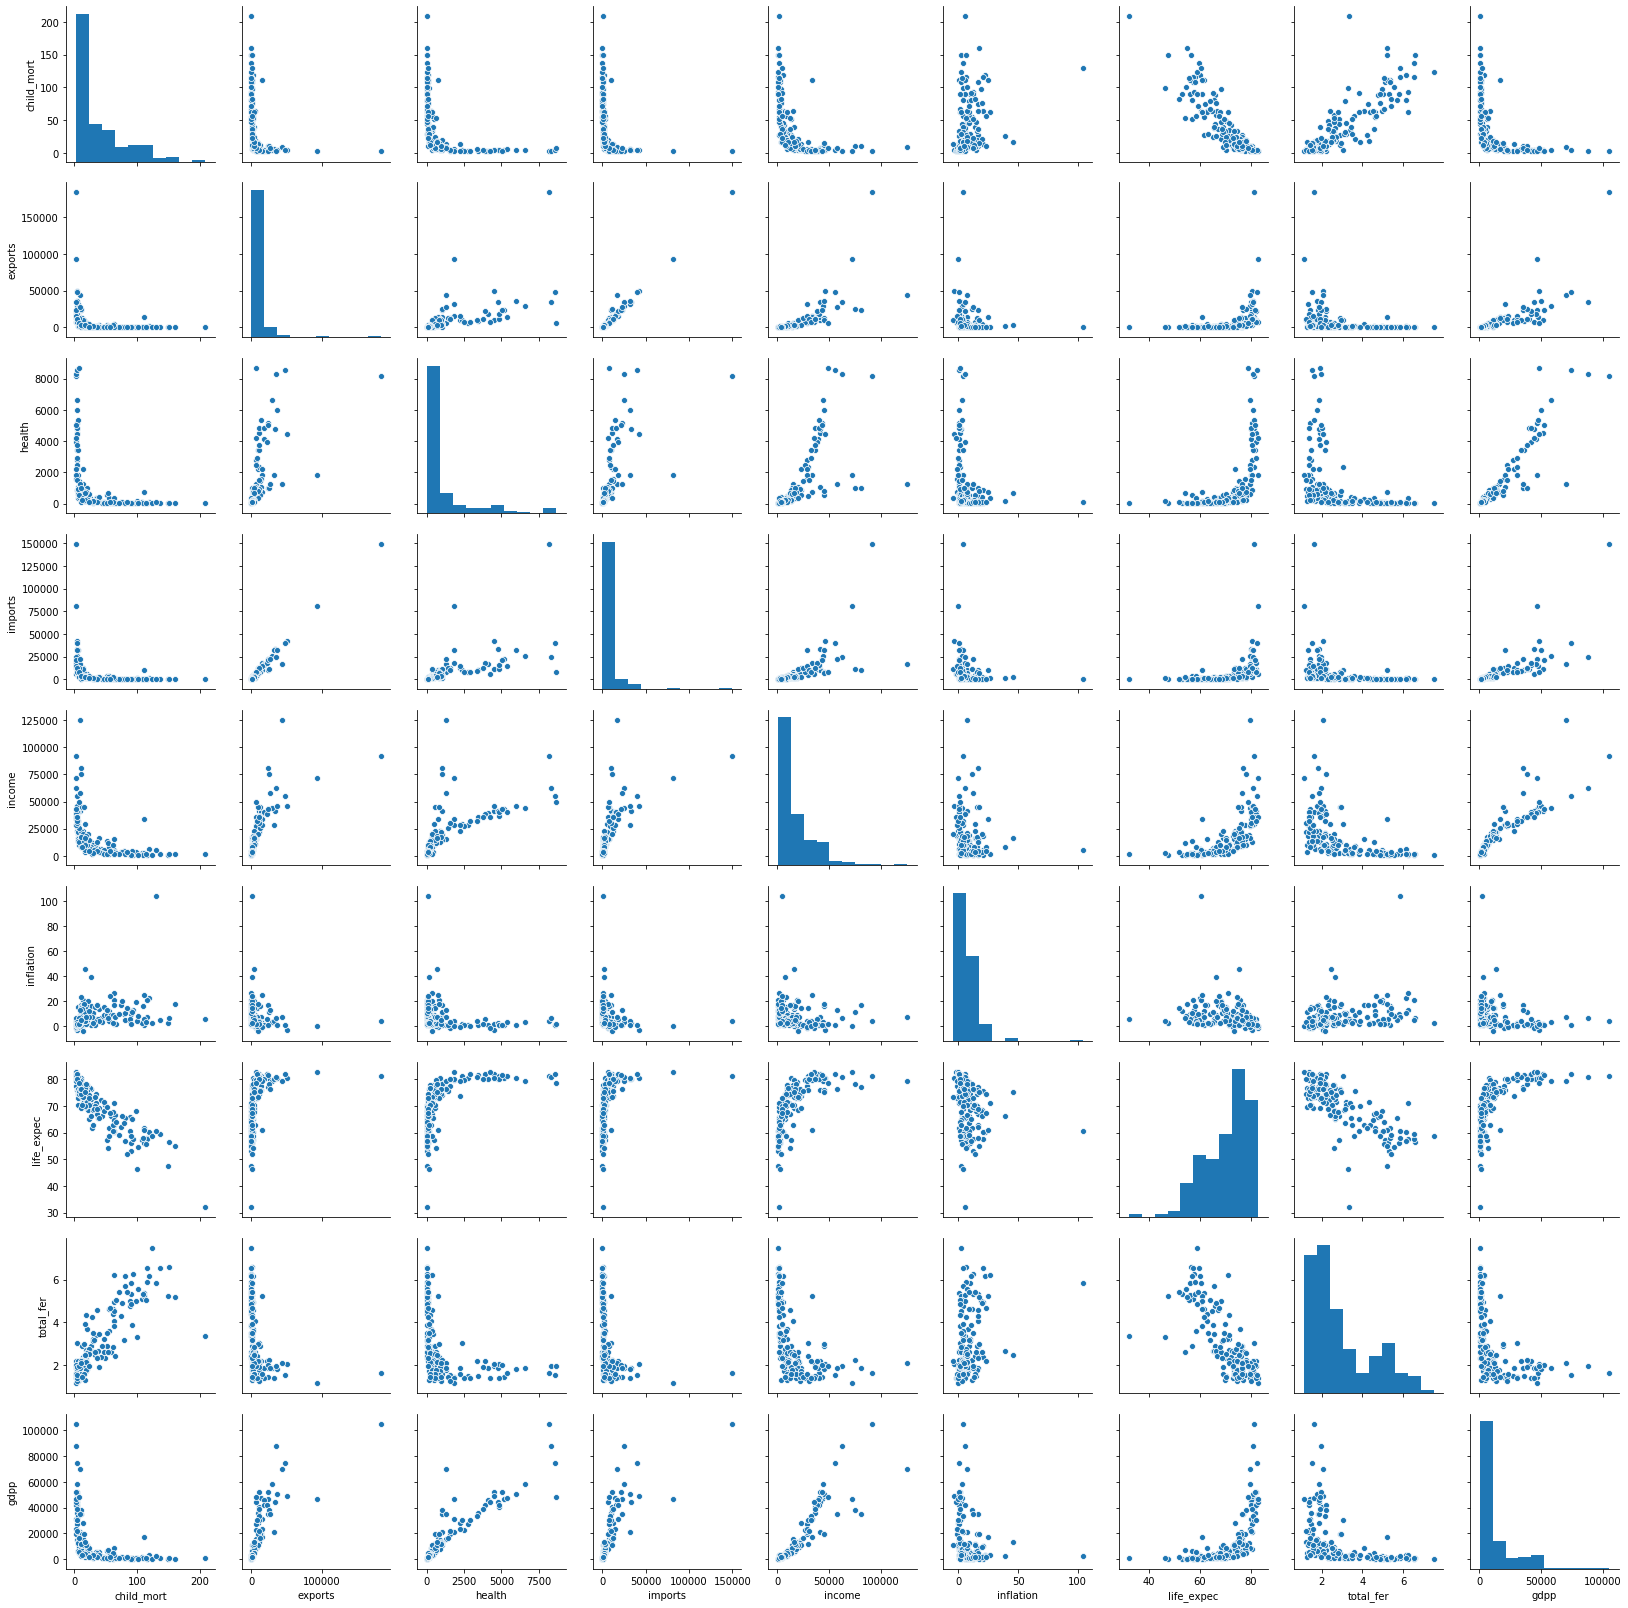

In [14]:
sns.pairplot(num_var)
plt.show()

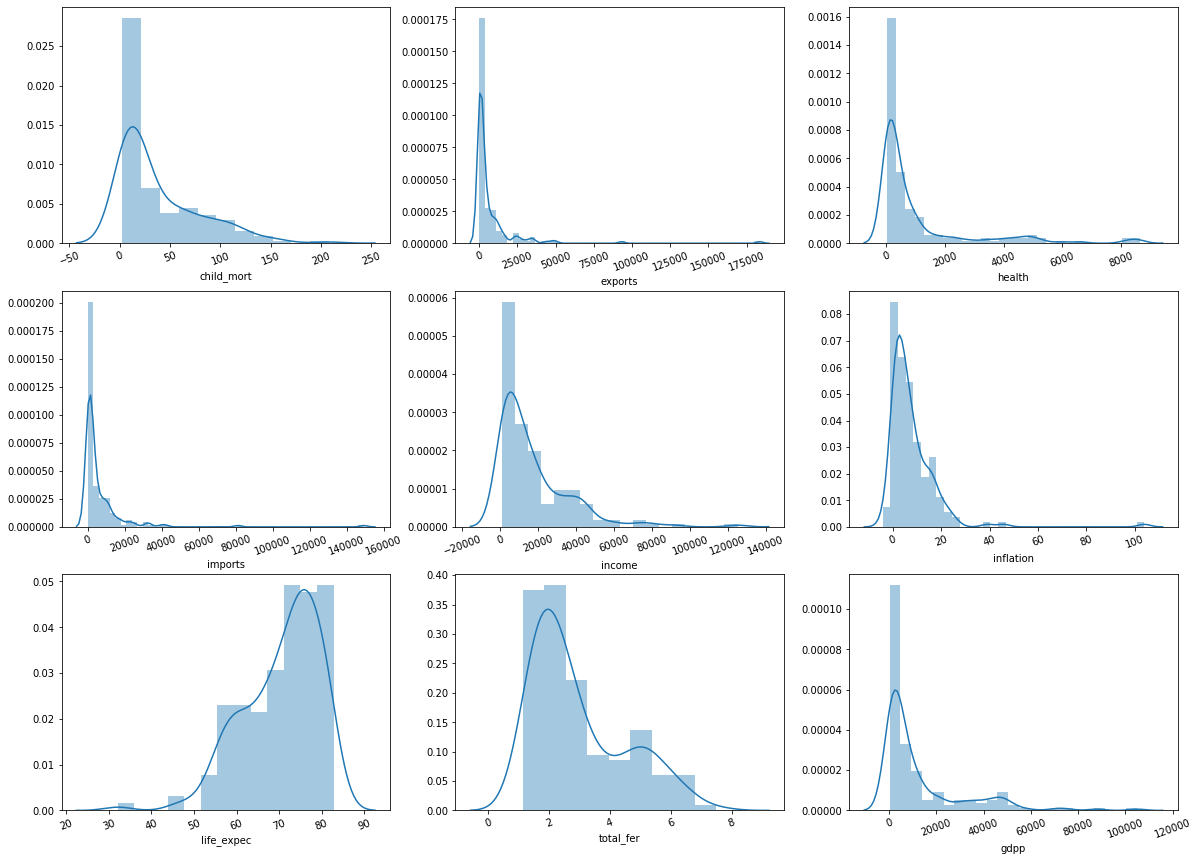

In [15]:
plt.figure(figsize=(20,20))
data=['child_mort', 'exports', 'health', 'imports', 'income', 'inflation', 'life_expec', 'total_fer', 'gdpp']
for i in enumerate(data):
    ax=plt.subplot(4,3,i[0]+1)
    sns.distplot(country[i[1]])
    plt.xticks(rotation=20)

# 4.  Prepare data for modeling

## Part 1: prepare data for modeling (using whole dataframe)

In [16]:
country1 = country[['country','child_mort', 'exports', 'health', 'imports', 'income', 'inflation', 'life_expec', 'total_fer', 'gdpp']]
country1

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,1384.02,155.9250,1565.190,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,3847.50,662.8500,2376.000,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,943.20,89.6040,1050.620,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,393.00,67.8580,450.640,4480,23.60,67.5,4.67,1310


In [17]:
country1.shape

(167, 10)

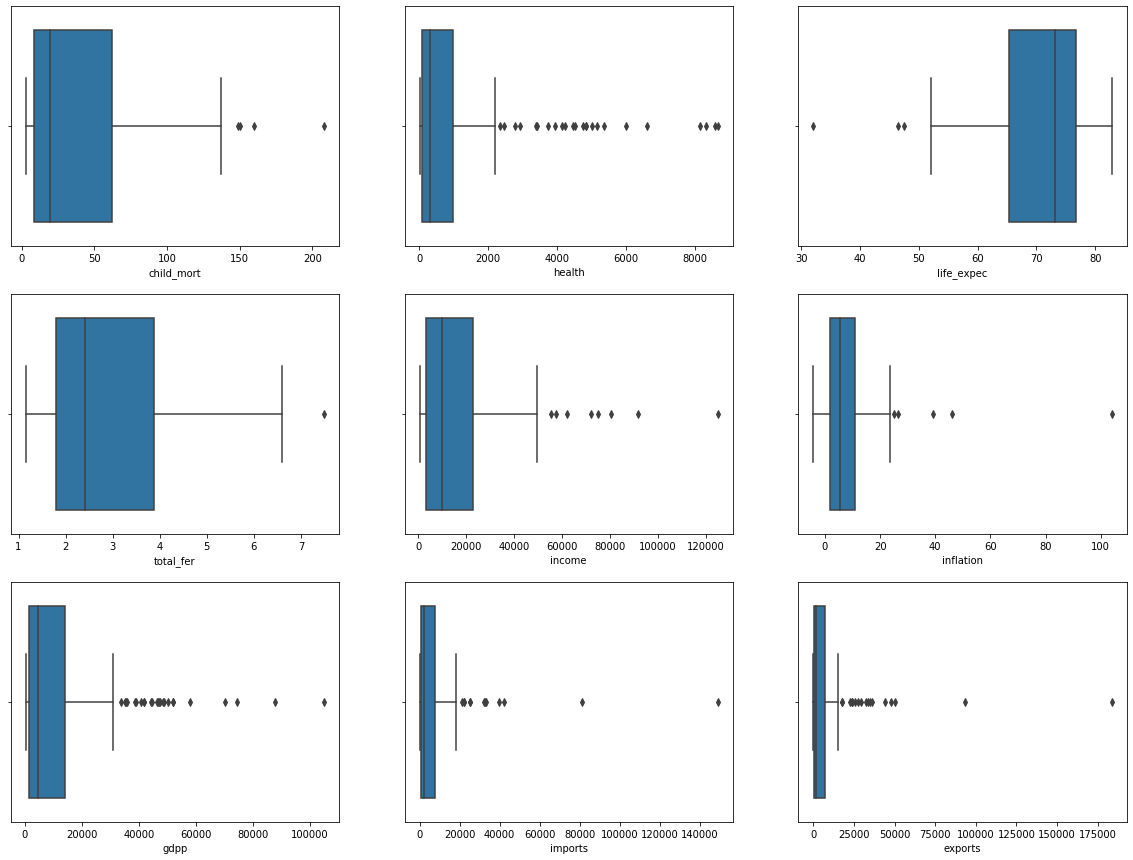

In [18]:
# outlier treatment
plt.figure(figsize=(20, 15))
plt.subplot(3,3,1)
sns.boxplot(country1['child_mort'])
plt.subplot(3,3,2)
sns.boxplot(country1['health'])
plt.subplot(3,3,3)
sns.boxplot(country1['life_expec'])
plt.subplot(3,3,4)
sns.boxplot(country1['total_fer'])
plt.subplot(3,3,5)
sns.boxplot(country1['income'])
plt.subplot(3,3,6)
sns.boxplot(country1['inflation'])
plt.subplot(3,3,7)
sns.boxplot(country1['gdpp'])
plt.subplot(3,3,8)
sns.boxplot(country1['imports'])
plt.subplot(3,3,9)
sns.boxplot(country1['exports'])
plt.show()

### Two types of outliers:
 - statistical
 - domain specific

In [19]:
# removing (statistical) outliers
# outlier treatment for child_mort
Q1 = country1.child_mort.quantile(0.01)
Q3 = country1.child_mort.quantile(0.99)

country1.child_mort[country1.child_mort <= Q1]=Q1
country1.child_mort[country1.child_mort >= Q3]=Q3


# outlier treatment for exports
Q1 = country1.exports.quantile(0.01)
Q3 = country1.exports.quantile(0.99)

country1.exports[country1.exports <= Q1] =Q1
country1.exports[country1.exports >=Q3] =Q3

# outlier treatment for health
Q1 = country1.health.quantile(0.01)
Q3 = country1.health.quantile(0.99)

country1.health[country1.health <= Q1] =Q1
country1.health[country1.health >=Q3] =Q3

# outlier treatment for imports
Q1 = country1.imports.quantile(0.01)
Q3 = country1.imports.quantile(0.99)

country1.imports[country1.imports <= Q1] =Q1
country1.imports[country1.imports >=Q3] =Q3

# outlier treatment for income
Q1 = country1.income.quantile(0.01)
Q3 = country1.income.quantile(0.99)

country1.income[country1.income <= Q1] =Q1
country1.income[country1.income >=Q3] =Q3

# outlier treatment for inflation
Q1 = country1.inflation.quantile(0.01)
Q3 = country1.inflation.quantile(0.99)

country1.inflation[country1.inflation <= Q1] =Q1
country1.inflation[country1.inflation >=Q3] =Q3

# outlier treatment for life_expec
Q1 = country1.life_expec.quantile(0.01)
Q3 = country1.life_expec.quantile(0.99)

country1.life_expec[country1.life_expec<= Q1] =Q1
country1.life_expec[country1.life_expec>=Q3] =Q3

# outlier treatment for total_fer
Q1 = country1.total_fer.quantile(0.01)
Q3 = country1.total_fer.quantile(0.99)

country1.total_fer[country1.total_fer<= Q1] =Q1
country1.total_fer[country1.total_fer>=Q3] =Q3


# outlier treatment for gdpp
Q1 = country1.gdpp.quantile(0.01)
Q3 = country1.gdpp.quantile(0.99)

country1.gdpp[country1.gdpp<= Q1] =Q1
country1.gdpp[country1.gdpp>=Q3] =Q3

country1

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,41.9174,248.297,1610.0,9.440,56.2,5.82,553.0
1,Albania,16.6,1145.20,267.8950,1987.740,9930.0,4.490,76.3,1.65,4090.0
2,Algeria,27.3,1712.64,185.9820,1400.440,12900.0,16.100,76.5,2.89,4460.0
3,Angola,119.0,2199.19,100.6050,1514.370,5900.0,22.400,60.1,6.16,3530.0
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100.0,1.440,76.8,2.13,12200.0
...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,1384.02,155.9250,1565.190,2950.0,2.620,63.0,3.50,2970.0
163,Venezuela,17.1,3847.50,662.8500,2376.000,16500.0,41.478,75.4,2.47,13500.0
164,Vietnam,23.3,943.20,89.6040,1050.620,4490.0,12.100,73.1,1.95,1310.0
165,Yemen,56.3,393.00,67.8580,450.640,4480.0,23.600,67.5,4.67,1310.0


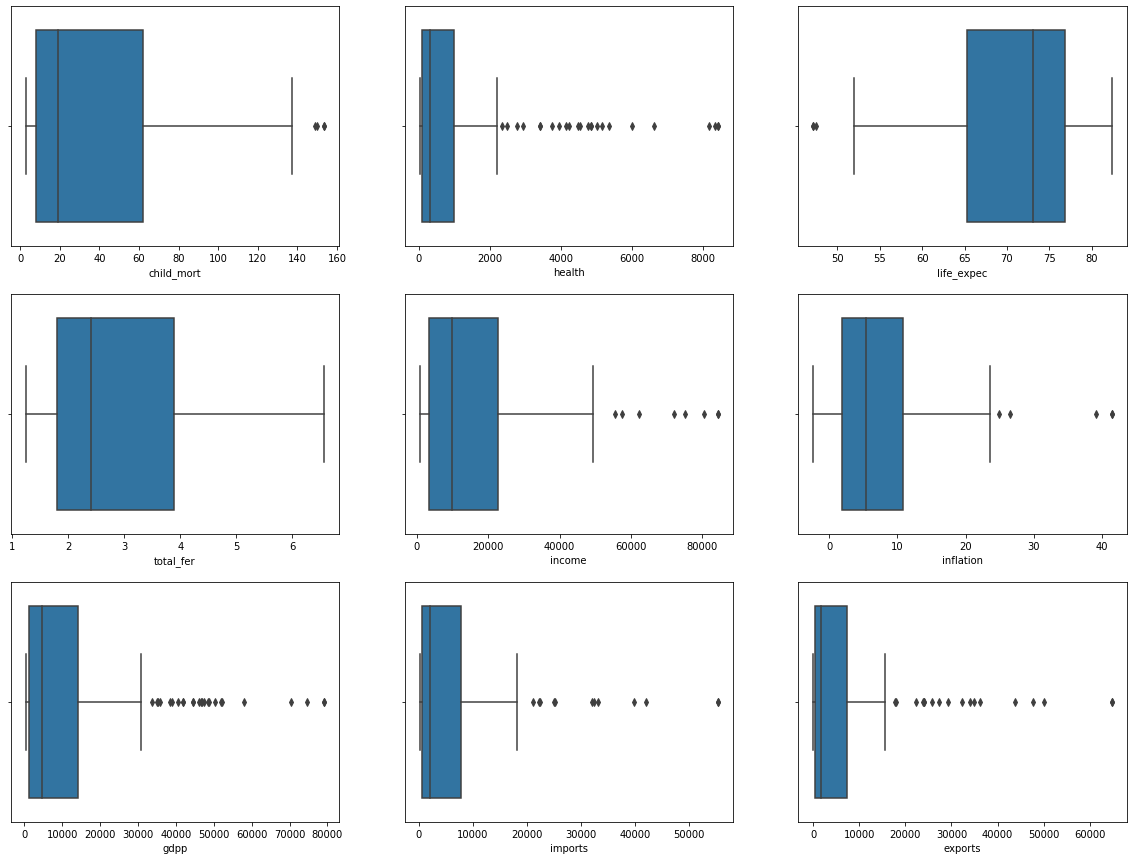

In [20]:
plt.figure(figsize=(20, 15))
plt.subplot(3,3,1)
sns.boxplot(country1['child_mort'])
plt.subplot(3,3,2)
sns.boxplot(country1['health'])
plt.subplot(3,3,3)
sns.boxplot(country1['life_expec'])
plt.subplot(3,3,4)
sns.boxplot(country1['total_fer'])
plt.subplot(3,3,5)
sns.boxplot(country1['income'])
plt.subplot(3,3,6)
sns.boxplot(country1['inflation'])
plt.subplot(3,3,7)
sns.boxplot(country1['gdpp'])
plt.subplot(3,3,8)
sns.boxplot(country1['imports'])
plt.subplot(3,3,9)
sns.boxplot(country1['exports'])
plt.show()

## 5 : Hopkins Statistics Test

The Hopkins statistic (introduced by Brian Hopkins and John Gordon Skellam) is a statistic which gives a value which indicates the cluster tendency, in other words: how well the data can be clustered.

- If the value is between {0.01, ...,0.3}, the data is regularly spaced.

- If the value is around 0.5, it is random.

- If the value is between {0.7, ..., 0.99}, it has a high tendency to cluster.

In [21]:
# Calculating Hopkins score to know whether the data is good for clustering or not.

from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [22]:
hopkins(country.drop('country',axis=1))

0.9472673148658527

- high tendancy to cluster

# 6. Rescaling

In [23]:
# 2. rescaling
rfm_df = country1[['child_mort', 'exports', 'health', 'imports', 'income', 'inflation', 'life_expec', 'total_fer', 'gdpp']]

# instantiate
scaler = StandardScaler()

# fit_transform
rfm_df_scaled = scaler.fit_transform(rfm_df)
rfm_df_scaled.shape

(167, 9)

In [24]:
rfm_df_scaled = pd.DataFrame(rfm_df_scaled)
rfm_df_scaled.columns = ['child_mort', 'exports', 'health', 'imports', 'income', 'inflation', 'life_expec', 'total_fer', 'gdpp']
                         
rfm_df_scaled.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.344012,-0.569638,-0.566983,-0.598844,-0.851772,0.263649,-1.693799,1.926928,-0.702314
1,-0.547543,-0.473873,-0.440417,-0.413679,-0.387025,-0.375251,0.663053,-0.865911,-0.498775
2,-0.272548,-0.424015,-0.486295,-0.476198,-0.221124,1.123260,0.686504,-0.035427,-0.477483
3,2.084186,-0.381264,-0.534113,-0.464070,-0.612136,1.936405,-1.236499,2.154642,-0.531000
4,-0.709457,-0.086754,-0.178431,0.139659,0.125202,-0.768917,0.721681,-0.544433,-0.032079


In [25]:
rfm_df_scaled.shape

(167, 9)

# 7. Finding the Optimal Number of Clusters using Kmean 

### 7.1 SSD / Elbow Curve to get the right number of Clusters
A fundamental step for any unsupervised algorithm is to determine the optimal number of clusters into which the data may be clustered. The Elbow Method is one of the most popular methods to determine this optimal value of k.

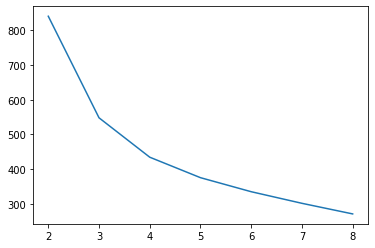

In [26]:
# elbow-curve/SSD
ssd = []
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(rfm_df_scaled)
    
    ssd.append([num_clusters,kmeans.inertia_])
    
# plot the SSDs for each n_clusters
# ssd
plt.plot(pd.DataFrame(ssd)[0], pd.DataFrame(ssd)[1])

### 7.2 Silhouette Analysis

$$\text{silhouette score}=\frac{p-q}{max(p,q)}$$

$p$ is the mean distance to the points in the nearest cluster that the data point is not a part of

$q$ is the mean intra-cluster distance to all the points in its own cluster.

* The value of the silhouette score range lies between -1 to 1. 

* A score closer to 1 indicates that the data point is very similar to other data points in the cluster, 

* A score closer to -1 indicates that the data point is not similar to the data points in its cluster.

### Look at the silhouette score plot and choose the optimal number of cluster

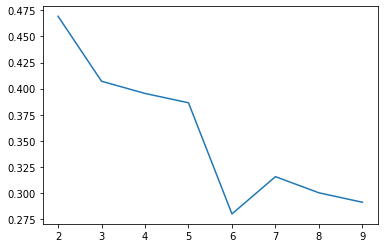

In [27]:
#First we'll do the silhouette score analysis
from sklearn.metrics import silhouette_score
ss = []
for k in range(2,10):
    kmeans = KMeans(n_clusters = k).fit(rfm_df_scaled)
    ss.append([k, silhouette_score(rfm_df_scaled, kmeans.labels_)])
    
plt.plot(pd.DataFrame(ss)[0], pd.DataFrame(ss)[1]);

In [28]:
# silhouette analysis
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

for num_clusters in range_n_clusters:
    
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(rfm_df_scaled)
    
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(rfm_df_scaled, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))

For n_clusters=2, the silhouette score is 0.46939980287788113
For n_clusters=3, the silhouette score is 0.40708993455880504
For n_clusters=4, the silhouette score is 0.39539142309551445
For n_clusters=5, the silhouette score is 0.38612511707914937
For n_clusters=6, the silhouette score is 0.295687966331977
For n_clusters=7, the silhouette score is 0.2851726080492121
For n_clusters=8, the silhouette score is 0.2991539499870981


##### Inference:
- i have choose the countries which deduced by Kmean clustering because both the elbow method and Silhouette Analysis collectively make a good decision on choosing number of clusters i.e n=3
- so my analysis is based on kmean clustered data

In [29]:
# final model with k=3
kmeans = KMeans(n_clusters=3, max_iter=50)
kmeans.fit(rfm_df_scaled)
#centroids = kmeans.centroids
centroids = kmeans.cluster_centers_

In [30]:
print(centroids)

[[ 1.34749254 -0.49725446 -0.52608487 -0.53720606 -0.72379806  0.41448121
  -1.29898722  1.35913998 -0.6241439 ]
 [-0.44608365 -0.26896584 -0.29423633 -0.24319265 -0.17060836 -0.03429503
   0.32222783 -0.46902602 -0.28478671]
 [-0.84593495  1.65776344  1.78390839  1.64390447  1.72748481 -0.57960501
   1.15003041 -0.79401299  1.91688659]]


In [31]:
kmeans.labels_

array([0, 1, 1, 0, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 0, 1, 1, 1, 0,
       1, 2, 1, 0, 0, 1, 0, 2, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 2, 1,
       2, 1, 1, 1, 1, 0, 0, 1, 1, 2, 2, 0, 0, 1, 2, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 2, 1, 1, 1, 0, 2, 1, 2, 1, 2, 1, 1, 0, 0, 2, 1, 0, 1, 1, 0,
       0, 1, 1, 2, 1, 0, 0, 1, 1, 0, 2, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       2, 2, 0, 0, 2, 1, 0, 1, 1, 1, 1, 1, 1, 2, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 2, 1, 2, 0, 0, 1, 2, 1, 1, 0, 1, 2, 2, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 2, 2, 2, 1, 1, 1, 1, 1, 0, 0])

In [32]:
# assign the label
country1['cluster_id']= kmeans.labels_
country1.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id
0,Afghanistan,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.82,553.0,0
1,Albania,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.65,4090.0,1
2,Algeria,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.89,4460.0,1
3,Angola,119.0,2199.19,100.6050,1514.370,5900.0,22.40,60.1,6.16,3530.0,0
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.13,12200.0,1


In [33]:
country1['cluster_id'].value_counts()

1    90
0    48
2    29
Name: cluster_id, dtype: int64

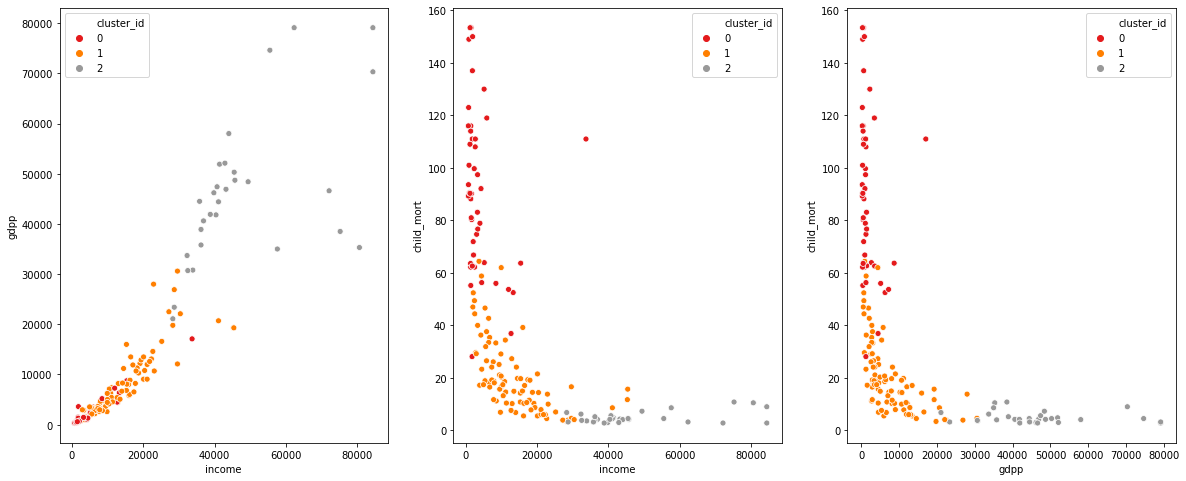

In [34]:
# plotting the cluster ith respect to he clusters obtained
plt.figure(figsize=[20,8])
plt.subplot(1,3,1)
sns.scatterplot(x= 'income', y= 'gdpp', hue='cluster_id', legend='full', data=country1, palette= 'Set1')
plt.subplot(1,3,2)
sns.scatterplot(x= 'income', y= 'child_mort', hue='cluster_id', legend='full', data=country1, palette= 'Set1')
plt.subplot(1,3,3)
sns.scatterplot(x= 'gdpp', y= 'child_mort', hue='cluster_id', legend='full', data=country1, palette= 'Set1')
plt.show()

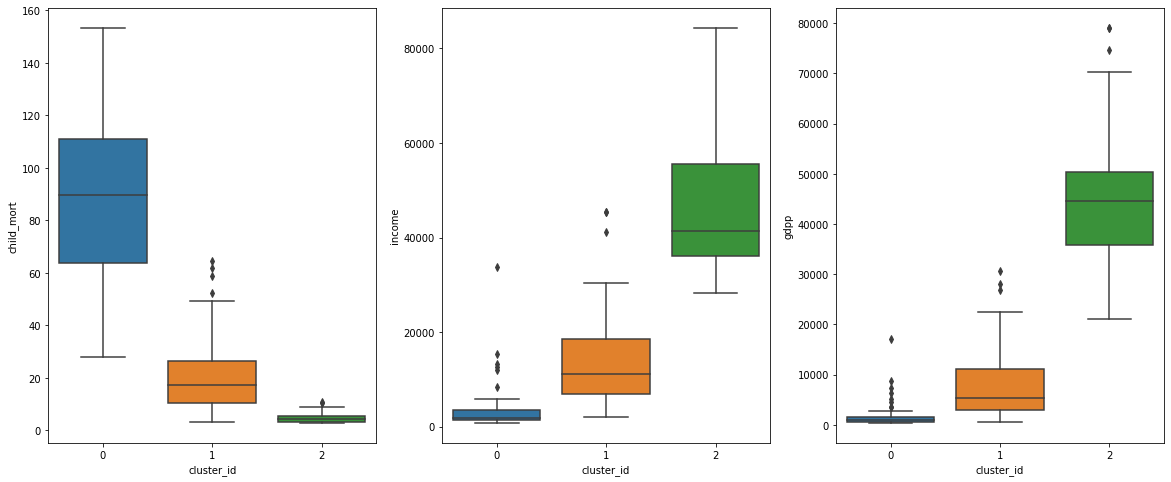

In [35]:
plt.figure(figsize=(20,8))
plt.subplot(1,3,1)
sns.boxplot(x='cluster_id', y='child_mort', data=country1)
plt.subplot(1,3,2)
sns.boxplot(x='cluster_id', y='income', data=country1)
plt.subplot(1,3,3)
sns.boxplot(x='cluster_id', y='gdpp', data=country1)
plt.show()

## 7.3 Cluster profiling

In [36]:
country1.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id
0,Afghanistan,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.82,553.0,0
1,Albania,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.65,4090.0,1
2,Algeria,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.89,4460.0,1
3,Angola,119.0,2199.19,100.6050,1514.370,5900.0,22.40,60.1,6.16,3530.0,0
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.13,12200.0,1


In [37]:
country1.groupby("cluster_id").mean()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
cluster_id,,,,,,,,,
0,90.335417,879.097657,114.939003,827.327888,3901.010000,10.608604,59.567083,4.972233,1911.400833
1,20.547778,3477.250726,528.894338,3589.291996,13804.333333,7.131624,73.393333,2.242591,7808.577778
2,4.989655,25405.359310,4239.330028,21316.695862,47784.413793,2.906731,80.453103,1.757352,46068.137931


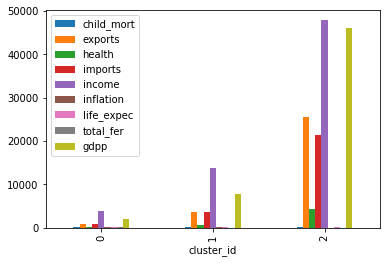

In [38]:
country1.groupby("cluster_id").mean().plot(kind='bar')

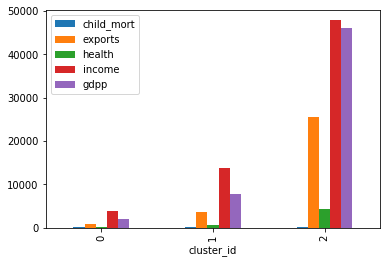

In [39]:
country1[['child_mort', 'exports','health','income', 'gdpp', 'cluster_id']].groupby('cluster_id').mean().plot(kind= 'bar')
plt.show()

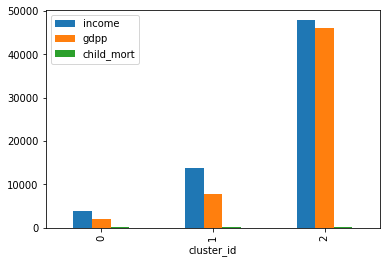

In [40]:
country1[['income','gdpp','child_mort', 'cluster_id']].groupby('cluster_id').mean().plot(kind= 'bar')
plt.show()

### Inference:
Child Mortality is highest for Cluster0, These clusters need some aid.
Income and Gdpp are measures of development. Higher the per capita income and gdpp better is the country's development. Income per capita and gdpp seems lowest for countries in clusters 0. Hence, these countries need some help.

In [41]:
#country1.groupby('cluster_id1').sort_values(by='child_mort', ascending= False)
KMEAN_cluster_country=country1[country1['cluster_id']==0].sort_values(by=['income','gdpp','child_mort'],ascending=[True, True,False])
KMEAN_cluster_country.head(10)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id
88,Liberia,89.3,62.457000,38.5860,302.80200,742.24,5.47,60.8,5.0200,331.62,0
37,"Congo, Dem. Rep.",116.0,137.274000,26.4194,165.66400,742.24,20.80,57.5,6.5400,334.00,0
26,Burundi,93.6,22.243716,26.7960,104.90964,764.00,12.30,57.7,6.2600,331.62,0
112,Niger,123.0,77.256000,17.9568,170.86800,814.00,2.55,58.8,6.5636,348.00,0
31,Central African Republic,149.0,52.628000,17.7508,118.19000,888.00,2.01,47.5,5.2100,446.00,0
106,Mozambique,101.0,131.985000,21.8299,193.57800,918.00,7.64,54.5,5.5600,419.00,0
94,Malawi,90.5,104.652000,30.2481,160.19100,1030.00,12.10,53.1,5.3100,459.00,0
63,Guinea,109.0,196.344000,31.9464,279.93600,1190.00,16.10,58.0,5.3400,648.00,0
150,Togo,90.3,196.176000,37.3320,279.62400,1210.00,1.18,58.7,4.8700,488.00,0
132,Sierra Leone,153.4,67.032000,52.2690,137.65500,1220.00,17.20,55.0,5.2000,399.00,0


- hence we need those top 10 countries whose child_mort= high, gdpp= low, income=low
- so all these 3 conditions are satisfied with cluster 0 , thats why urgent aid should be provided to the countires of cluster 0 which are :<br>

Liberia<br>
Congo, Dem. Rep.<br>
Burundi<br>
Niger<br>
Central African Republic<br>
Mozambique<br>
Malawi<br>
Guinea<br>
Togo<br>
Sierra Leone<br>

# 7.4  Hierarchical Clustering

In [42]:
rfm_df_scaled.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.344012,-0.569638,-0.566983,-0.598844,-0.851772,0.263649,-1.693799,1.926928,-0.702314
1,-0.547543,-0.473873,-0.440417,-0.413679,-0.387025,-0.375251,0.663053,-0.865911,-0.498775
2,-0.272548,-0.424015,-0.486295,-0.476198,-0.221124,1.123260,0.686504,-0.035427,-0.477483
3,2.084186,-0.381264,-0.534113,-0.464070,-0.612136,1.936405,-1.236499,2.154642,-0.531000
4,-0.709457,-0.086754,-0.178431,0.139659,0.125202,-0.768917,0.721681,-0.544433,-0.032079


#### Single Linkage:

In single linkage hierarchical clustering, the distance between two clusters is defined as the shortest distance between two points in each cluster. 

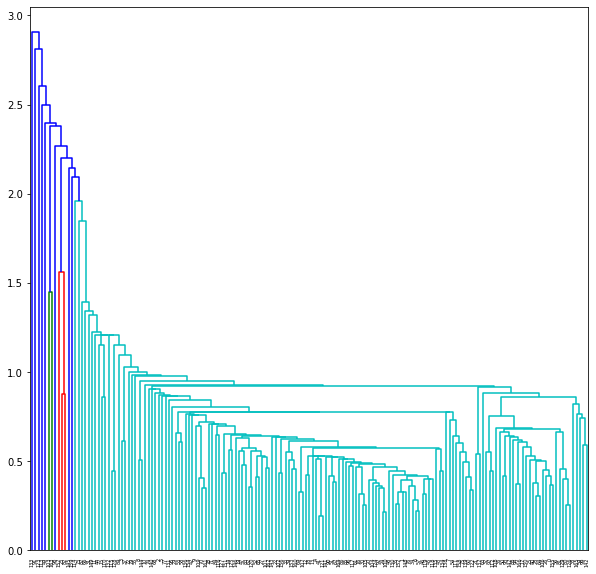

In [43]:
# single linkage
plt.figure(figsize=(10, 10))
mergings = linkage(rfm_df_scaled, method="single", metric='euclidean')
dendrogram(mergings)
plt.show()

#### Complete Linkage

In complete linkage hierarchical clustering, the distance between two clusters is defined as the longest distance between two points in each cluster. 

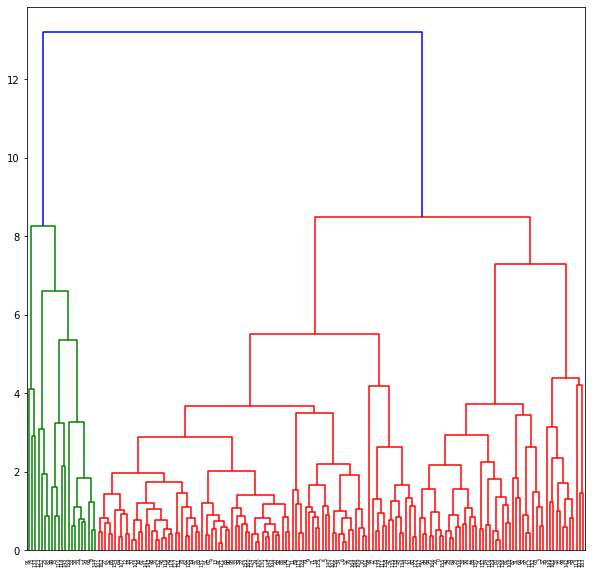

In [44]:
# complete linkage
plt.figure(figsize=(10, 10))
mergings = linkage(rfm_df_scaled, method="complete", metric='euclidean')
dendrogram(mergings)
plt.show()

In [45]:
### Looking at the dendrogram it is observed that cutting it at n = 4 is most optimum.

In [46]:
# 5 clusters
cluster_labels = cut_tree(mergings, n_clusters=4).reshape(-1, )
cluster_labels

array([0, 1, 1, 0, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 0, 1, 1, 1, 0,
       1, 2, 1, 0, 0, 1, 0, 2, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       2, 1, 1, 1, 1, 0, 0, 1, 1, 2, 2, 0, 0, 1, 2, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 2, 1, 1, 1, 0, 3, 1, 1, 1, 1, 1, 1, 0, 0, 2, 1, 0, 1, 1, 0,
       0, 1, 1, 3, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1,
       2, 1, 0, 0, 2, 1, 0, 1, 1, 1, 1, 1, 1, 2, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 3, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 2, 2, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 2, 1, 2, 1, 1, 1, 0, 1, 0, 0])

In [47]:
# assign cluster labels
country1['cluster_labels'] = cluster_labels
country1.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id,cluster_labels
0,Afghanistan,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.82,553.0,0,0
1,Albania,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.65,4090.0,1,1
2,Algeria,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.89,4460.0,1,1
3,Angola,119.0,2199.19,100.6050,1514.370,5900.0,22.40,60.1,6.16,3530.0,0,0
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.13,12200.0,1,1


In [48]:
country1['cluster_labels'].value_counts()

1    96
0    50
2    18
3     3
Name: cluster_labels, dtype: int64

### Inference:
It seems there is proper distribution of countries in each clusters.

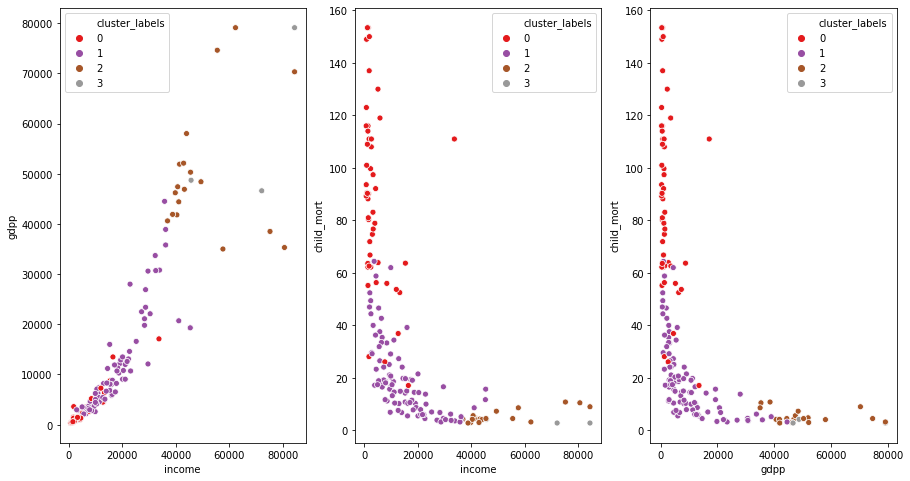

In [49]:
# plotting the cluster ith respect to he clusters obtained
plt.figure(figsize=[15,8])
plt.subplot(1,3,1)
sns.scatterplot(x= 'income', y= 'gdpp', hue='cluster_labels', legend='full', data=country1, palette= 'Set1')
plt.subplot(1,3,2)
sns.scatterplot(x= 'income', y= 'child_mort', hue='cluster_labels', legend='full', data=country1, palette= 'Set1')
plt.subplot(1,3,3)
sns.scatterplot(x= 'gdpp', y= 'child_mort', hue='cluster_labels', legend='full', data=country1, palette= 'Set1')
plt.show()

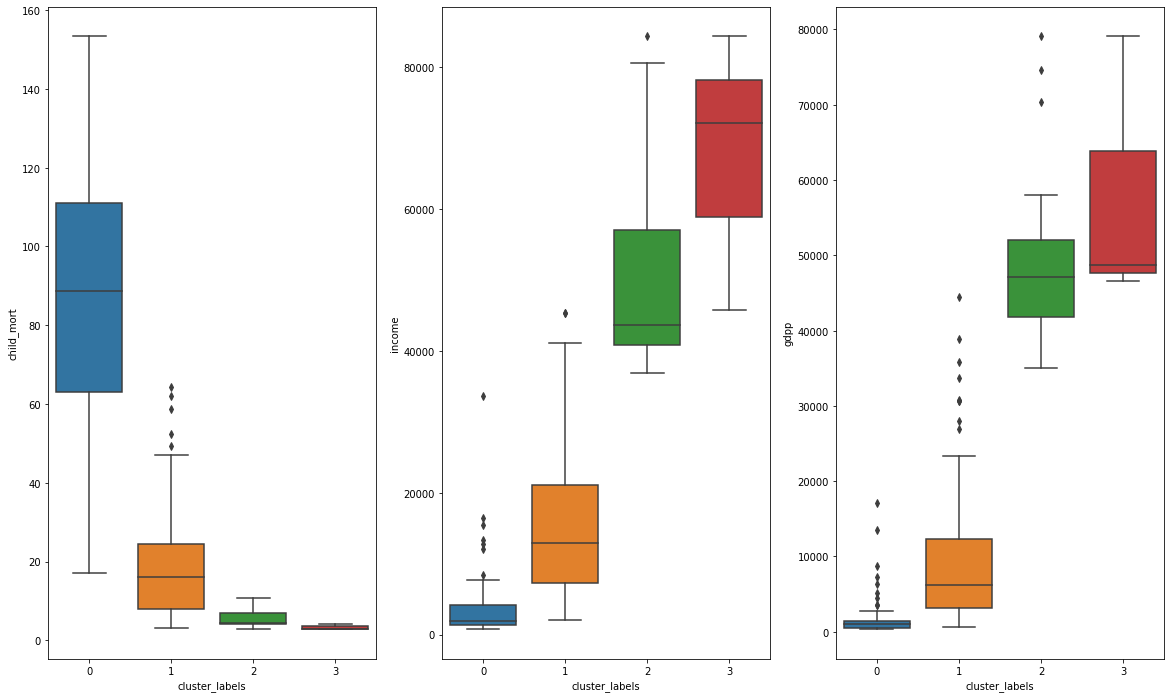

In [50]:
plt.figure(figsize=(20, 12))
plt.subplot(1,3,1)
sns.boxplot(x='cluster_labels', y='child_mort', data=country1)
plt.subplot(1,3,2)
sns.boxplot(x='cluster_labels', y='income', data=country1)
plt.subplot(1,3,3)
sns.boxplot(x='cluster_labels', y='gdpp', data=country1)
plt.show()

### Inference:
Child Mortality is highest for Cluster 0 . These cluster need some aid.
Income and Gdpp are measures of development. Higher the per capita income and gdpp better is the country's development. Income per capita and gdpp seems lowest for countries in clusters 0 . Hence, these countries need some help.

### Cluster profiling

In [51]:
country1.drop('cluster_id', axis=1).groupby('cluster_labels').mean()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
cluster_labels,,,,,,,,,
0,87.586000,945.634750,126.481642,871.805773,4229.169600,11.797820,60.016400,4.875544,2157.944800
1,19.188542,4326.711618,733.089171,4474.111767,15438.333333,5.936460,74.069479,2.181075,9849.187500
2,5.494444,24972.727778,4715.450044,19719.938889,51093.000000,4.129889,80.122222,1.854444,50149.333333
3,3.266667,59916.506667,4826.463333,50956.093333,67391.333333,0.408400,81.356667,1.641067,58129.333333


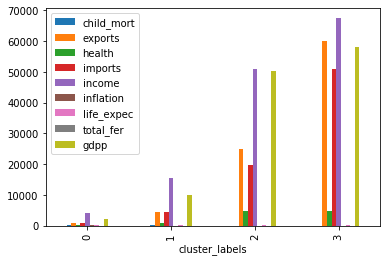

In [52]:
country1.drop('cluster_id', axis=1).groupby('cluster_labels').mean().plot(kind= 'bar')
plt.show()

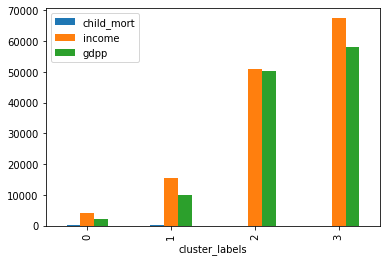

In [53]:
country1[['child_mort', 'income', 'gdpp', 'cluster_labels']].groupby('cluster_labels').mean().plot(kind= 'bar')
plt.show()

### Inference:
Child Mortality is highest for Cluster 0 . These cluster need some aid.
Income and Gdpp are measures of development. Higher the per capita income and gdpp better is the country's development. Income per capita and gdpp seems lowest for countries in clusters 0 . Hence, these countries need some help.

In [54]:
country1= country1.drop("cluster_id", axis=1)
country1.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_labels
0,Afghanistan,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.82,553.0,0
1,Albania,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.65,4090.0,1
2,Algeria,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.89,4460.0,1
3,Angola,119.0,2199.19,100.6050,1514.370,5900.0,22.40,60.1,6.16,3530.0,0
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.13,12200.0,1


### Finding the observations that belong to certain cluster

In [55]:
# let's filter the data with selected cluster
hirarichal_cluster_country =country1[country1['cluster_labels']==0].sort_values(by=['income','gdpp','child_mort'],ascending=[True, True,False]).head(10)
hirarichal_cluster_country

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_labels
88,Liberia,89.3,62.457000,38.5860,302.80200,742.24,5.47,60.8,5.0200,331.62,0
37,"Congo, Dem. Rep.",116.0,137.274000,26.4194,165.66400,742.24,20.80,57.5,6.5400,334.00,0
26,Burundi,93.6,22.243716,26.7960,104.90964,764.00,12.30,57.7,6.2600,331.62,0
112,Niger,123.0,77.256000,17.9568,170.86800,814.00,2.55,58.8,6.5636,348.00,0
31,Central African Republic,149.0,52.628000,17.7508,118.19000,888.00,2.01,47.5,5.2100,446.00,0
106,Mozambique,101.0,131.985000,21.8299,193.57800,918.00,7.64,54.5,5.5600,419.00,0
94,Malawi,90.5,104.652000,30.2481,160.19100,1030.00,12.10,53.1,5.3100,459.00,0
63,Guinea,109.0,196.344000,31.9464,279.93600,1190.00,16.10,58.0,5.3400,648.00,0
150,Togo,90.3,196.176000,37.3320,279.62400,1210.00,1.18,58.7,4.8700,488.00,0
132,Sierra Leone,153.4,67.032000,52.2690,137.65500,1220.00,17.20,55.0,5.2000,399.00,0


# 7. Final Analysis

##### I have analyzed both K-means and Hierarchial clustering and found clusters formed are identical and the list of countries are getting same from both the methods .So   the clusters formed by K-means and hierarichal clustering based on the information provided by the final clusters I have deduce the final list of countries which are in need of aid based on k mean 

- Both the clustering method gives same result i.e same top 10 countries where the cluster formation are different 
- still i have choosen kmean because in keman the total number of cluster depend on elbow and silhouite analysis 
- my analysis based on kmean clustering's result 

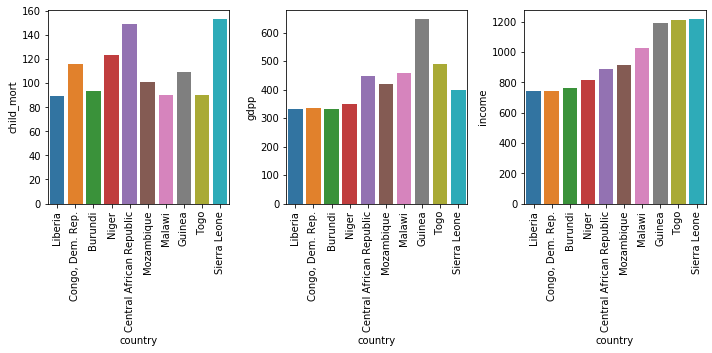

In [56]:
fig = plt.figure(figsize=(10, 5))
# Child Mortality Rate : Death of children under 5 years of age per 1000 live births
plt.subplot(1,3,1)
sns.barplot(x='country', y='child_mort', data=KMEAN_cluster_country.head(10))
plt.xticks(rotation = 90)

# Fertility Rate: The number of children that would be born to each woman if the current age-fertility rates remain the same
plt.subplot(1,3,2)
sns.barplot(x='country', y='gdpp', data=KMEAN_cluster_country.head(10))
plt.xticks(rotation = 90)

# Life Expectancy: The average number of years a new born child would live if the current mortality patterns are to remain same
plt.subplot(1,3,3)
sns.barplot(x='country', y='income', data=KMEAN_cluster_country.head(10))
plt.xticks(rotation = 90)
fig.tight_layout()


plt.show()

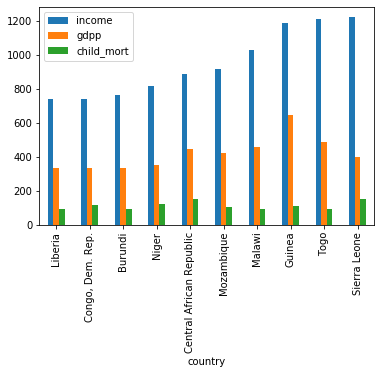

In [57]:
KMEAN_cluster_country.head(10).plot(x='country',y=['income','gdpp','child_mort'],kind='bar')

In [58]:
KMEAN_cluster_country.head(10)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id
88,Liberia,89.3,62.457000,38.5860,302.80200,742.24,5.47,60.8,5.0200,331.62,0
37,"Congo, Dem. Rep.",116.0,137.274000,26.4194,165.66400,742.24,20.80,57.5,6.5400,334.00,0
26,Burundi,93.6,22.243716,26.7960,104.90964,764.00,12.30,57.7,6.2600,331.62,0
112,Niger,123.0,77.256000,17.9568,170.86800,814.00,2.55,58.8,6.5636,348.00,0
31,Central African Republic,149.0,52.628000,17.7508,118.19000,888.00,2.01,47.5,5.2100,446.00,0
106,Mozambique,101.0,131.985000,21.8299,193.57800,918.00,7.64,54.5,5.5600,419.00,0
94,Malawi,90.5,104.652000,30.2481,160.19100,1030.00,12.10,53.1,5.3100,459.00,0
63,Guinea,109.0,196.344000,31.9464,279.93600,1190.00,16.10,58.0,5.3400,648.00,0
150,Togo,90.3,196.176000,37.3320,279.62400,1210.00,1.18,58.7,4.8700,488.00,0
132,Sierra Leone,153.4,67.032000,52.2690,137.65500,1220.00,17.20,55.0,5.2000,399.00,0


## Closing Statement
We have identified few factors like child mortality, income, gdpp plays a vital role in deciding the development status of the country and builded clusters of countries based on that. Based on those clusters we have identified the below list of countries which are in direct need of aid. The list of countries are subject to change as it is based on the few factors like Number of components chosen, Number of Clusters chosen, Clustering method used etc.which we have used to build the model.

In [59]:
# Final countries list
KMEAN_cluster_country.reset_index(drop=True).country.head(10)

0                     Liberia
1            Congo, Dem. Rep.
2                     Burundi
3                       Niger
4    Central African Republic
5                  Mozambique
6                      Malawi
7                      Guinea
8                        Togo
9                Sierra Leone
Name: country, dtype: object